In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2023-10-05 14:38:16.135398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-05 14:38:16.167062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-05 14:38:16.167242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!pip install opencv-python  protobuf==3.20.* tensorflow==2.7.0 tensorflow-estimator==2.7.0 keras scikeras tqdm google-auth==2.6.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
pip freeze

absl-py==2.0.0
adjustText==0.8
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==5.3.1
certifi==2019.11.28
cffi==1.15.1
chardet==3.0.4
clang==5.0
comm==0.1.3
contourpy==1.1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.2
executing==1.2.0
fastjsonschema==2.17.1
flatbuffers==2.0.7
fonttools==4.40.0
fqdn==1.5.1
gast==0.4.0
google-auth==2.6.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.56.0
h5py==3.1.0
idna==2.8
importlib-metadata==6.7.0
importlib-resources==5.12.0
ipykernel==6.24.0
ipython==8.12.2
ipython-genutils==0.2.0
ipywidgets==8.0.7
isoduration==20.11.0
jedi==0.18.2
Jinja2==3.1.2
joblib==1.3.2
jsonpointer==2.4
jsonschema==4.18.0
jsonschema-specifications==2023.6.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.6.3
jupyter-http-over-ws==0.0.8
jupyter_client==8.3.0


In [4]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adadelta

In [5]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
from tensorflow.python.framework.config import set_memory_growth
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train =  x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=32)

x_train.shape, x_val.shape, y_train.shape, y_val.shape


((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

In [8]:
def add_gaussian_noise(img_inp):
    # Add Gaussian noise to the image
    noise = np.random.normal(loc=0, scale=0.5, size=img_inp.shape)
    x_train_noisy = img_inp + (0.1 * noise)
    return x_train_noisy

In [9]:
x_val_noise = add_gaussian_noise(x_val)
x_test_noise = add_gaussian_noise(x_test)

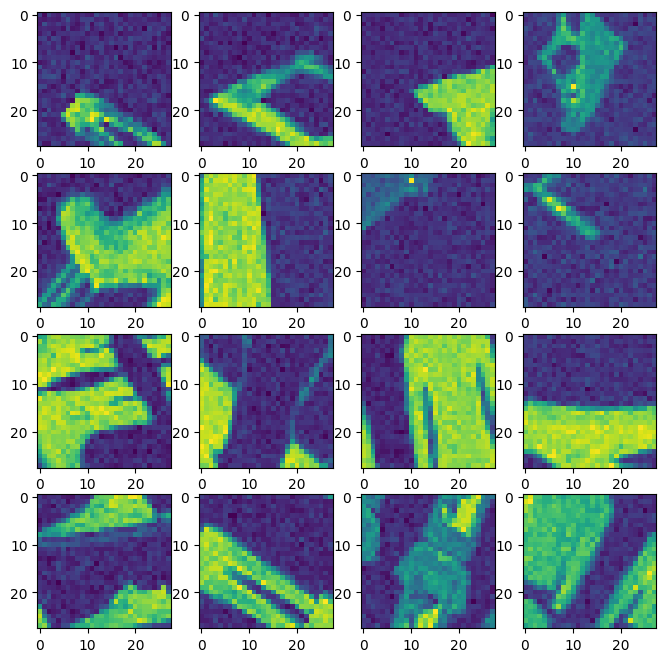

In [10]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

fig = plt.figure(figsize=(8, 8))
counter = 1

# Define parameters
Npic = 5
rotation_range = 90
width_shift_range = 0.5
height_shift_range = 0.5
shear_range = 0.2
zoom_range = 0.5
horizontal_flip = True

# Define ImageDataGenerator with parameters
for m in fill_method:
  datagen = ImageDataGenerator( 
                                preprocessing_function=add_gaussian_noise,
                                rotation_range=rotation_range,
                                width_shift_range=width_shift_range,
                                height_shift_range=height_shift_range,
                                shear_range=shear_range,
                                zoom_range=zoom_range,
                                horizontal_flip=horizontal_flip,
                                fill_mode = m
                              )

  pic = datagen.flow(x_train, y_train, batch_size = 16)
  for i in range(1, Npic):
      batch = pic.next()
      im_result = batch[0][0]
      fig.add_subplot(4, 4, counter)
      plt.imshow(im_result)
      counter+=1

In [11]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

In [29]:
# # create_autoencoder function
# def create_autoencoder(optimizer, learning_rate):

#     Input_img = Input(shape=(28, 28, 1))
    
#     x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(Input_img)
#     x2 = MaxPooling2D((2, 2))(x1)
#     encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)

#     # Decoding architecture
#     x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#     x4 = UpSampling2D((2, 2))(x3)
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x4)

#     # กำหนด optimizer setting
#     autoencoder = Model(Input_img, decoded) # เอา model มาใช้
#     autoencoder.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mean_squared_error') # -> loss ใช้ Mean Square Error
#     return autoencoder
def create_autoencoder(optimizer, learning_rate):
    # encoder
    Input_img = Input(shape=(28, 28, 1))
    x = Conv2D(8, (4, 4), activation="relu", padding="same")(Input_img)
    x = MaxPooling2D((2, 2), padding="same")(x)
    x = Conv2D(4, (4, 4), padding="same", activation="relu")(x)
    x = MaxPooling2D((2, 2), padding="same")(x)
    x = Conv2D(4, (4, 4), padding="same", activation="relu")(x)
    encoded = MaxPooling2D((2, 2), padding="same")(x) # bottleneck
    
    #decoder
    x = Conv2D(4, (4, 4), activation="relu", padding="same")(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(4, (4, 4), activation="relu", padding="same")(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (4, 4), activation="relu", padding="same")(Input_img)
    decoded = Conv2D(1, (4, 4), padding="same")(x)
    
    autoencoder = Model(Input_img, decoded) # เอา model มาใช้
    autoencoder.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mean_squared_error')
    return autoencoder
    
    

In [30]:
autoencoder = create_autoencoder(optimizer=Adadelta, learning_rate=0.01)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 8)         136       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 1)         129       
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [31]:
callback = EarlyStopping(monitor='loss', patience=10)
batch_size = 100
epochs=70

In [32]:
print(x_test.shape)

(10000, 28, 28, 1)


In [33]:
history = autoencoder.fit(
                          datagen.flow(x_train,x_train, batch_size=batch_size),
                          epochs=epochs, 
                          steps_per_epoch=x_train.shape[0]//batch_size,
                          validation_data=datagen.flow(x_val,x_val, batch_size=batch_size),
                          callbacks=[callback],
                          verbose=1)

Epoch 1/70
420/420 [==============================] - 17s 40ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.2257 - val_loss: 0.2042
Epoch 2/70
420/420 [==============================] - 17s 40ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1488 - val_loss: 0.1277
Epoch 3/70
420/420 [==============================] - 16s 39ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1232 - val_loss: 0.1201
Epoch 4/70
420/420 [==============================] - 17s 40ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1174 - val_loss: 0.1157
Epoch 5/70
420/420 [==============================] - 17s 41ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1144 - val_loss: 0.1138
Epoch 6/70
420/420 [==============================] - 17s 40ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1130 - val_loss: 0.1128
Epoch 7/70
420/420 [==============================] - 18s 42ms/step - batch: 209.5000 - size: 100.0000 - loss: 0.1122 - val_loss: 0.1121
Epoch 8/70
420/420 [=====================

In [34]:
x_test_noise.shape

(10000, 28, 28, 1)

In [35]:
# ทดสอบ autoencoder model ด้วย validation
predictions = autoencoder.predict(x_val_noise)
predictions.shape


(18000, 28, 28, 1)

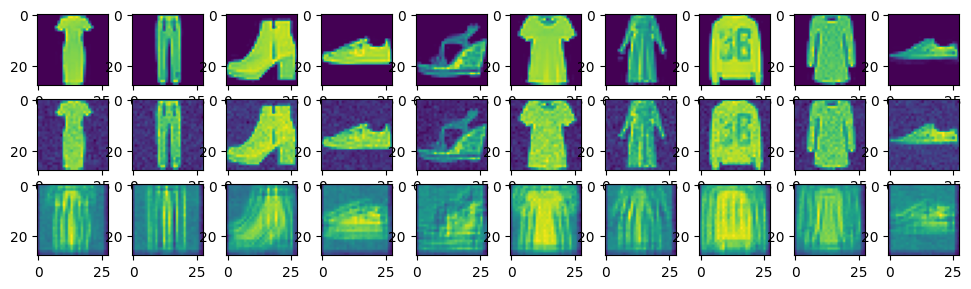

In [36]:
fig = plt.figure(figsize=(12, 12))
size = 10



for i in range(0, size):
  fig.add_subplot(size+1, size, i+1)
  plt.imshow(x_val[i])
  fig.add_subplot(size+1, size, size+i+1)
  plt.imshow(x_val_noise[i])
  fig.add_subplot(size+1, size, size+size+i+1)
#   plt.imshow(predictions[i])
  plt.imshow(predictions[i])

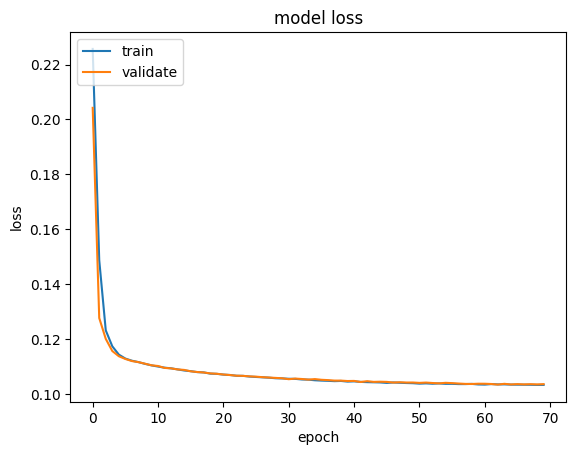

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()